# read the csv data

In [8]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
import nltk
from nltk.sentiment import SentimentIntensityAnalyzer

In [4]:
comments = pd.read_csv(r'C:\Users\user\Downloads\YOTUBE DATA ANALYIS/UScomments.csv' , error_bad_lines=False)

C:\Users\user\AppData\Local\Temp\ipykernel_15664\526985663.py:1: FutureWarning: The error_bad_lines argument has been deprecated and will be removed in a future version. Use on_bad_lines in the future.


  comments = pd.read_csv(r'C:\Users\user\Downloads\YOTUBE DATA ANALYIS/UScomments.csv' , error_bad_lines=False)
Skipping line 41589: expected 4 fields, saw 11
Skipping line 51628: expected 4 fields, saw 7
Skipping line 114465: expected 4 fields, saw 5

Skipping line 142496: expected 4 fields, saw 8
Skipping line 189732: expected 4 fields, saw 6
Skipping line 245218: expected 4 fields, saw 7

Skipping line 388430: expected 4 fields, saw 5

C:\Users\user\AppData\Local\Temp\ipykernel_15664\526985663.py:1: DtypeWarning: Columns (2,3) have mixed types. Specify dtype option on import or set low_memory=False.
  comments = pd.read_csv(r'C:\Users\user\Downloads\YOTUBE DATA ANALYIS/UScomments.csv' , error_bad_lines=False)


In [5]:
comments.head()

,video_id,comment_text,likes,replies
0,XpVt6Z1Gjjo,Logan Paul it's yo big day ‼️‼️‼️,4,0
1,XpVt6Z1Gjjo,I've been following you from the start of your...,3,0
2,XpVt6Z1Gjjo,Say hi to Kong and maverick for me,3,0
3,XpVt6Z1Gjjo,MY FAN . attendance,3,0
4,XpVt6Z1Gjjo,trending 😉,3,0


In [6]:
comments.isnull().sum()

video_id         0
comment_text    25
likes            0
replies          0
dtype: int64

In [7]:
comments.shape

(691400, 4)

In [8]:
comments.dropna(inplace = True)

In [9]:
comments.shape

(691375, 4)

# perform sentiment analysis

In [10]:
# !pip install textblob
### lets perform sentiment analysis using TextBlob which is a NLP library built on top of NLTK )..

In [11]:
from textblob import TextBlob

In [12]:
comments.head(6)

,video_id,comment_text,likes,replies
0,XpVt6Z1Gjjo,Logan Paul it's yo big day ‼️‼️‼️,4,0
1,XpVt6Z1Gjjo,I've been following you from the start of your...,3,0
2,XpVt6Z1Gjjo,Say hi to Kong and maverick for me,3,0
3,XpVt6Z1Gjjo,MY FAN . attendance,3,0
4,XpVt6Z1Gjjo,trending 😉,3,0
5,XpVt6Z1Gjjo,#1 on trending AYYEEEEE,3,0


In [13]:
comments.shape

(691375, 4)

In [14]:
polarity = []

for comment in comments['comment_text']:
    try:
        polarity.append(TextBlob(comment).sentiment.polarity)
    except:
        polarity.append(0)

In [15]:
comments['polarity']  = polarity

### Inserting polarity values into comments dataframe while defining feature name as "polarity"

In [16]:
comments.head()

,video_id,comment_text,likes,replies,polarity
0,XpVt6Z1Gjjo,Logan Paul it's yo big day ‼️‼️‼️,4,0,0.0
1,XpVt6Z1Gjjo,I've been following you from the start of your...,3,0,0.0
2,XpVt6Z1Gjjo,Say hi to Kong and maverick for me,3,0,0.0
3,XpVt6Z1Gjjo,MY FAN . attendance,3,0,0.0
4,XpVt6Z1Gjjo,trending 😉,3,0,0.0


In [17]:
# create a function to attribute the sentiments in words and apply
def analyze_sentiment(polarity):
    if polarity > 0:
        return "Positive"
    elif polarity == 0:
        return "Neutral"
    else:
        return "Negative"
comments['sentiment'] = comments['polarity'].apply(analyze_sentiment)

In [18]:
comments.head()

,video_id,comment_text,likes,replies,polarity,sentiment
0,XpVt6Z1Gjjo,Logan Paul it's yo big day ‼️‼️‼️,4,0,0.0,Neutral
1,XpVt6Z1Gjjo,I've been following you from the start of your...,3,0,0.0,Neutral
2,XpVt6Z1Gjjo,Say hi to Kong and maverick for me,3,0,0.0,Neutral
3,XpVt6Z1Gjjo,MY FAN . attendance,3,0,0.0,Neutral
4,XpVt6Z1Gjjo,trending 😉,3,0,0.0,Neutral


In [19]:
comments['sentiment'].value_counts(normalize = True)

Positive    0.435069
Neutral     0.411390
Negative    0.153540
Name: sentiment, dtype: float64

In [20]:
comments['polarity'].describe()

count    691375.000000
mean          0.137812
std           0.342138
min          -1.000000
25%           0.000000
50%           0.000000
75%           0.342130
max           1.000000
Name: polarity, dtype: float64

### Summary statistics

The min value is -1 which indicates the polarty of the most negative comment is strongly negative

The max value is 1 which indicates the polarity of the most positive value is highly positive

The mean value is 0.137812 which indicates the average polarity or intensity of sentiment across all comments is positive. This suggests that, on average, the polarity tends to be slightly positive.



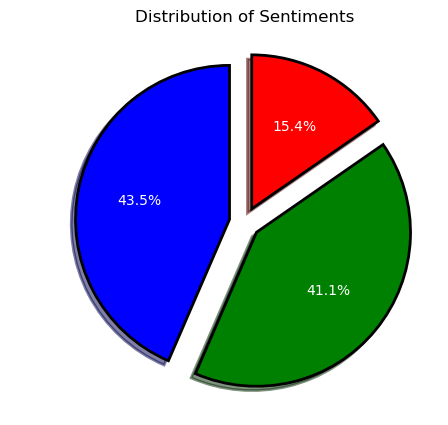

In [21]:
fig = plt.figure(figsize = (5,5))
colors = ("blue", "green", "red")
wp = {'linewidth': 2, "edgecolor" : "black"}
tags = comments['sentiment'].value_counts(normalize = True)
explode = (0.1, 0.1, 0.1)
tags.plot(kind = "pie", autopct = "%1.1f%%", shadow = True, colors= colors, startangle = 90, wedgeprops = wp, explode=explode, label='', textprops={'color': 'white'})
plt.title('Distribution of Sentiments')
plt.show()


# wordcloud analysis

### What are the most frequent words in negative comments?

In [22]:
polarity = []

for comment in comments['comment_text']:
    try:
        polarity.append(TextBlob(comment).sentiment.polarity)
    except:
        polarity.append(0)

In [23]:
comments['polarity']  = polarity

In [24]:
def analyze_sentiment(polarity):
    if polarity > 0:
        return "Positive"
    elif polarity == 0:
        return "Neutral"
    else:
        return "Negative"
comments['sentiment'] = comments['polarity'].apply(analyze_sentiment)

In [26]:
comments.head(5)

,video_id,comment_text,likes,replies,polarity,sentiment
0,XpVt6Z1Gjjo,Logan Paul it's yo big day ‼️‼️‼️,4,0,0.0,Neutral
1,XpVt6Z1Gjjo,I've been following you from the start of your...,3,0,0.0,Neutral
2,XpVt6Z1Gjjo,Say hi to Kong and maverick for me,3,0,0.0,Neutral
3,XpVt6Z1Gjjo,MY FAN . attendance,3,0,0.0,Neutral
4,XpVt6Z1Gjjo,trending 😉,3,0,0.0,Neutral


In [27]:
filter1 = comments['polarity']==1

In [28]:
comments_positive = comments[filter1]

In [29]:
comments_positive.head(5)

,video_id,comment_text,likes,replies,polarity,sentiment
64,XpVt6Z1Gjjo,yu are the best,1,0,1.0,Positive
156,cLdxuaxaQwc,Power is the disease. Care is the cure. Keep...,0,0,1.0,Positive
227,WYYvHb03Eog,YAS Can't wait to get it! I just need to sell ...,0,0,1.0,Positive
307,sjlHnJvXdQs,This is priceless,0,0,1.0,Positive
319,sjlHnJvXdQs,Summed up perfectly,0,0,1.0,Positive


In [30]:
# !pip install wordcloud

In [31]:
from wordcloud import WordCloud, STOPWORDS

In [32]:
set(STOPWORDS)

{'a',
 'about',
 'above',
 'after',
 'again',
 'against',
 'all',
 'also',
 'am',
 'an',
 'and',
 'any',
 'are',
 "aren't",
 'as',
 'at',
 'be',
 'because',
 'been',
 'before',
 'being',
 'below',
 'between',
 'both',
 'but',
 'by',
 'can',
 "can't",
 'cannot',
 'com',
 'could',
 "couldn't",
 'did',
 "didn't",
 'do',
 'does',
 "doesn't",
 'doing',
 "don't",
 'down',
 'during',
 'each',
 'else',
 'ever',
 'few',
 'for',
 'from',
 'further',
 'get',
 'had',
 "hadn't",
 'has',
 "hasn't",
 'have',
 "haven't",
 'having',
 'he',
 "he'd",
 "he'll",
 "he's",
 'hence',
 'her',
 'here',
 "here's",
 'hers',
 'herself',
 'him',
 'himself',
 'his',
 'how',
 "how's",
 'however',
 'http',
 'i',
 "i'd",
 "i'll",
 "i'm",
 "i've",
 'if',
 'in',
 'into',
 'is',
 "isn't",
 'it',
 "it's",
 'its',
 'itself',
 'just',
 'k',
 "let's",
 'like',
 'me',
 'more',
 'most',
 "mustn't",
 'my',
 'myself',
 'no',
 'nor',
 'not',
 'of',
 'off',
 'on',
 'once',
 'only',
 'or',
 'other',
 'otherwise',
 'ought',
 'our',
 

In [33]:
type(comments_positive['comment_text'])

pandas.core.series.Series

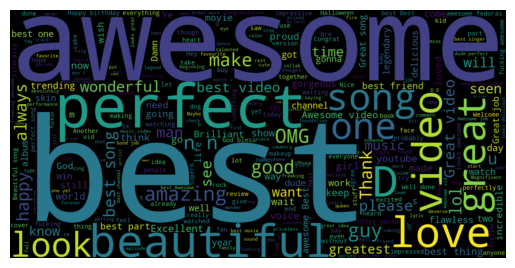

In [34]:
### for wordcloud , we need to frame our 'comment_text' feature into string ..
total_positive_comments = ' ' .join(comments_positive['comment_text'])

wordcloud = WordCloud(stopwords=set(STOPWORDS), max_words=300, width =1600, height =800).generate(total_positive_comments)
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.show()

Conclusion-->> positive Users are emphasizing more on best , awesome , perfect , amazing , look , happy  etc..

### What are the most frequent words in negative comments?

In [34]:
filter2 = comments['polarity']==-1

In [35]:
comments_negative = comments[filter2]
comments_negative.head(5)

,video_id,comment_text,likes,replies,polarity,sentiment
512,8wNr-NQImFg,BEN CARSON IS THE MAN!!!!! THEY HATE HIM CAUSE...,0,0,-1.0,Negative
562,8wNr-NQImFg,Well… The brain surgeon Ben Carson just proved...,0,0,-1.0,Negative
952,Ayb_2qbZHm4,WHY DID YOU MAKE FURRY FORCE?! SO NASTY!!!,0,0,-1.0,Negative
1371,vu_9muoxT50,WTF BRUH!!!!!!,0,0,-1.0,Negative
1391,vu_9muoxT50,cheeseus christ thats insane!!!,0,0,-1.0,Negative


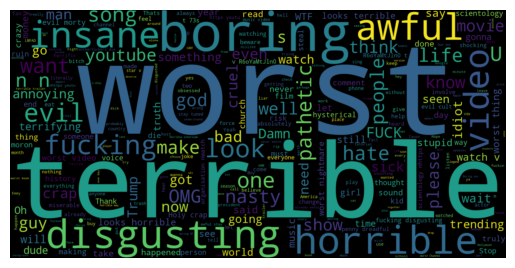

In [36]:
### for wordcloud , we need to frame our 'comment_text' feature into string ..
total_negative_comments = ' ' .join(comments_negative['comment_text'])

wordcloud = WordCloud(stopwords=set(STOPWORDS), max_words=300, width =1600, height =800).generate(total_negative_comments)
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.show()

Conclusion-->> Negative Users are emphasizing more on Terrible , worst ,horrible ,boring , disgusting etc..

# Collect entire data of youtube

In [81]:
import os

In [82]:
files = os.listdir(r'C:\Users\user\Downloads\YOTUBE DATA ANALYIS\additional_data')

In [83]:
files

['CAvideos.csv',
 'CA_category_id.json',
 'DEvideos.csv',
 'DE_category_id.json',
 'FRvideos.csv',
 'FR_category_id.json',
 'GBvideos.csv',
 'GB_category_id.json',
 'INvideos.csv',
 'IN_category_id.json',
 'JPvideos.csv',
 'JP_category_id.json',
 'KRvideos.csv',
 'KR_category_id.json',
 'MXvideos.csv',
 'MX_category_id.json',
 'RUvideos.csv',
 'RU_category_id.json',
 'USvideos.csv',
 'US_category_id.json']

In [84]:
## extracting csv files only from above list ..
files_csv = []

for file in files:
    if '.csv' in file:
        files_csv.append(file)

In [85]:
files_csv

['CAvideos.csv',
 'DEvideos.csv',
 'FRvideos.csv',
 'GBvideos.csv',
 'INvideos.csv',
 'JPvideos.csv',
 'KRvideos.csv',
 'MXvideos.csv',
 'RUvideos.csv',
 'USvideos.csv']

In [86]:
full_df = pd.DataFrame()
path = r'C:\Users\user\Downloads\YOTUBE DATA ANALYIS\additional_data'

In [87]:
import warnings
from warnings import filterwarnings
filterwarnings('ignore')

In [88]:
for file in files_csv:
    current_df = pd.read_csv(path+'/'+file , encoding='iso-8859-1' , error_bad_lines=False)
    # The file path is constructed by combining the path variable and the file name from the loop
    full_df = pd.concat([full_df, current_df], ignore_index= True)

In [89]:
full_df.head(5)

,video_id,trending_date,title,channel_title,category_id,publish_time,tags,views,likes,dislikes,comment_count,thumbnail_link,comments_disabled,ratings_disabled,video_error_or_removed,description
0,n1WpP7iowLc,17.14.11,Eminem - Walk On Water (Audio) ft. BeyoncÃ©,EminemVEVO,10,2017-11-10T17:00:03.000Z,"Eminem|""Walk""|""On""|""Water""|""Aftermath/Shady/In...",17158579,787425,43420,125882,https://i.ytimg.com/vi/n1WpP7iowLc/default.jpg,False,False,False,Eminem's new track Walk on Water ft. BeyoncÃ© ...
1,0dBIkQ4Mz1M,17.14.11,PLUSH - Bad Unboxing Fan Mail,iDubbbzTV,23,2017-11-13T17:00:00.000Z,"plush|""bad unboxing""|""unboxing""|""fan mail""|""id...",1014651,127794,1688,13030,https://i.ytimg.com/vi/0dBIkQ4Mz1M/default.jpg,False,False,False,STill got a lot of packages. Probably will las...
2,5qpjK5DgCt4,17.14.11,"Racist Superman | Rudy Mancuso, King Bach & Le...",Rudy Mancuso,23,2017-11-12T19:05:24.000Z,"racist superman|""rudy""|""mancuso""|""king""|""bach""...",3191434,146035,5339,8181,https://i.ytimg.com/vi/5qpjK5DgCt4/default.jpg,False,False,False,WATCH MY PREVIOUS VIDEO â¶ \n\nSUBSCRIBE âº ...
3,d380meD0W0M,17.14.11,I Dare You: GOING BALD!?,nigahiga,24,2017-11-12T18:01:41.000Z,"ryan|""higa""|""higatv""|""nigahiga""|""i dare you""|""...",2095828,132239,1989,17518,https://i.ytimg.com/vi/d380meD0W0M/default.jpg,False,False,False,I know it's been a while since we did this sho...
4,2Vv-BfVoq4g,17.14.11,Ed Sheeran - Perfect (Official Music Video),Ed Sheeran,10,2017-11-09T11:04:14.000Z,"edsheeran|""ed sheeran""|""acoustic""|""live""|""cove...",33523622,1634130,21082,85067,https://i.ytimg.com/vi/2Vv-BfVoq4g/default.jpg,False,False,False,ð§: https://ad.gt/yt-perfect\nð°: https://...


##  Which Category has the maximum likes ?

In [90]:
full_df['category_id'].unique()

array([10, 23, 24, 25, 22, 26,  1, 28, 20, 17, 29, 15, 19,  2, 27, 43, 30,
       44], dtype=int64)

In [91]:
#lets read the json file

json_file = pd.read_json( r'C:\Users\user\Downloads\YOTUBE DATA ANALYIS\additional_data\US_category_id.json', orient='records')

In [92]:
json_file[:1]

,kind,etag,items
0,youtube#videoCategoryListResponse,"""m2yskBQFythfE4irbTIeOgYYfBU/S730Ilt-Fi-emsQJv...","{'kind': 'youtube#videoCategory', 'etag': '""m2..."


In [93]:
json_file['items'][0]

{'kind': 'youtube#videoCategory',
 'etag': '"m2yskBQFythfE4irbTIeOgYYfBU/Xy1mB4_yLrHy_BmKmPBggty2mZQ"',
 'id': '1',
 'snippet': {'channelId': 'UCBR8-60-B28hp2BmDPdntcQ',
  'title': 'Film & Animation',
  'assignable': True}}

In [94]:
json_file['items'][1]

{'kind': 'youtube#videoCategory',
 'etag': '"m2yskBQFythfE4irbTIeOgYYfBU/UZ1oLIIz2dxIhO45ZTFR3a3NyTA"',
 'id': '2',
 'snippet': {'channelId': 'UCBR8-60-B28hp2BmDPdntcQ',
  'title': 'Autos & Vehicles',
  'assignable': True}}

In [95]:
cat_dict = {}

for item in json_file['items'].values:
    cat_dict[int(item['id'])] = item['snippet']['title']

In [96]:
cat_dict

{1: 'Film & Animation',
 2: 'Autos & Vehicles',
 10: 'Music',
 15: 'Pets & Animals',
 17: 'Sports',
 18: 'Short Movies',
 19: 'Travel & Events',
 20: 'Gaming',
 21: 'Videoblogging',
 22: 'People & Blogs',
 23: 'Comedy',
 24: 'Entertainment',
 25: 'News & Politics',
 26: 'Howto & Style',
 27: 'Education',
 28: 'Science & Technology',
 29: 'Nonprofits & Activism',
 30: 'Movies',
 31: 'Anime/Animation',
 32: 'Action/Adventure',
 33: 'Classics',
 34: 'Comedy',
 35: 'Documentary',
 36: 'Drama',
 37: 'Family',
 38: 'Foreign',
 39: 'Horror',
 40: 'Sci-Fi/Fantasy',
 41: 'Thriller',
 42: 'Shorts',
 43: 'Shows',
 44: 'Trailers'}

In [97]:
full_df['category_name'] = full_df['category_id'].map(cat_dict)

In [98]:
full_df[:2]

,video_id,trending_date,title,channel_title,category_id,publish_time,tags,views,likes,dislikes,comment_count,thumbnail_link,comments_disabled,ratings_disabled,video_error_or_removed,description,category_name
0,n1WpP7iowLc,17.14.11,Eminem - Walk On Water (Audio) ft. BeyoncÃ©,EminemVEVO,10,2017-11-10T17:00:03.000Z,"Eminem|""Walk""|""On""|""Water""|""Aftermath/Shady/In...",17158579,787425,43420,125882,https://i.ytimg.com/vi/n1WpP7iowLc/default.jpg,False,False,False,Eminem's new track Walk on Water ft. BeyoncÃ© ...,Music
1,0dBIkQ4Mz1M,17.14.11,PLUSH - Bad Unboxing Fan Mail,iDubbbzTV,23,2017-11-13T17:00:00.000Z,"plush|""bad unboxing""|""unboxing""|""fan mail""|""id...",1014651,127794,1688,13030,https://i.ytimg.com/vi/0dBIkQ4Mz1M/default.jpg,False,False,False,STill got a lot of packages. Probably will las...,Comedy


In [99]:
full_df['likes'].describe()

count    3.759420e+05
mean     3.788431e+04
std      1.654131e+05
min      0.000000e+00
25%      6.690000e+02
50%      3.446000e+03
75%      1.747650e+04
max      5.613827e+06
Name: likes, dtype: float64

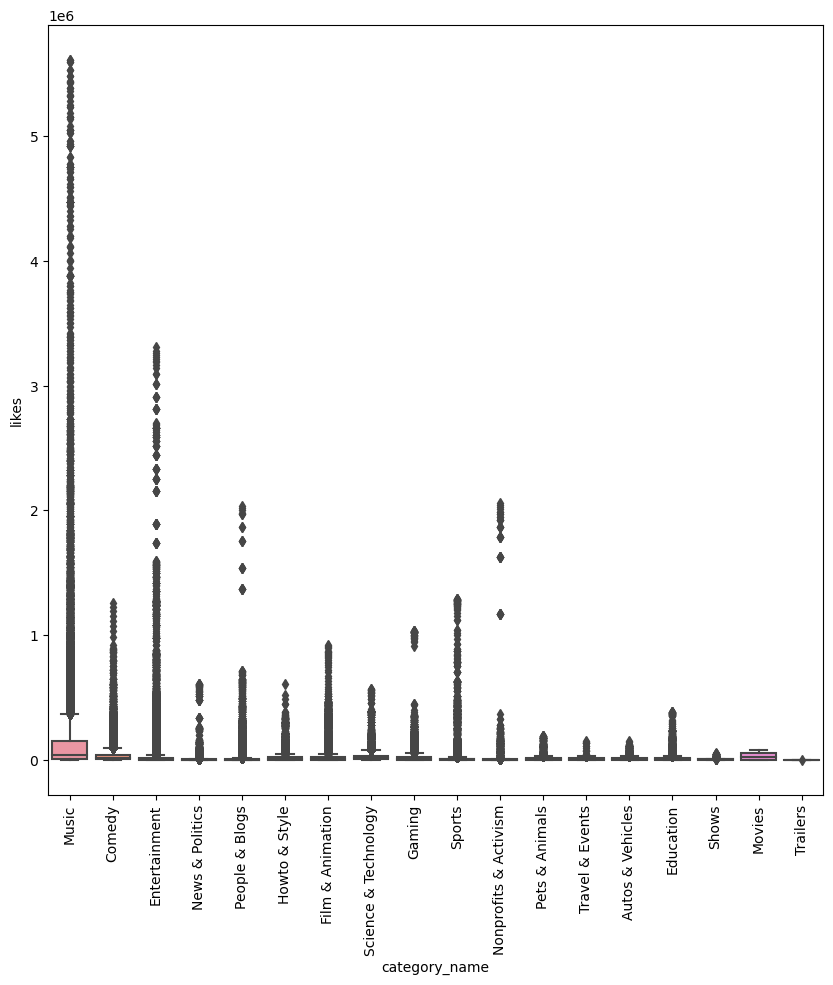

In [100]:
plt.figure(figsize=(10,10))
sns.boxplot(x='category_name' , y='likes' , data=full_df)
plt.xticks(rotation='vertical')
plt.show()

In [101]:
The music category has the highest maximum likes

SyntaxError: invalid syntax (3722351175.py, line 1)

## Find out whether audience is engaged or not

In [ ]:
full_df['like_rate'] = (full_df['likes']/full_df['views'])*100
full_df['dislike_rate'] = (full_df['dislikes']/full_df['views'])*100
full_df['comment_count_rate'] = (full_df['comment_count']/full_df['views'])*100

In [ ]:
full_df.head(5)

<Axes: xlabel='views', ylabel='likes'>

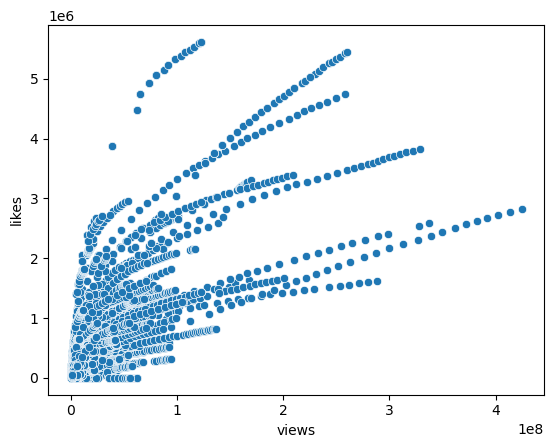

In [104]:
# analysing relationship between views & likes

sns.scatterplot(data = full_df, x = 'views', y='likes')


In [73]:
full_df[['views', 'likes', 'dislikes',]].corr()

,views,likes,dislikes
views,1.000000,0.777796,0.421653
likes,0.777796,1.000000,0.453710
dislikes,0.421653,0.453710,1.000000


<Axes: >

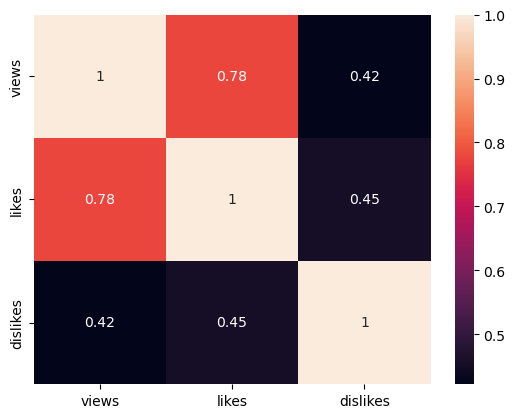

In [75]:
sns.heatmap(full_df[['views', 'likes', 'dislikes',]].corr(), annot = True)

The correlation between "views" and "likes" is 0.777796. This indicates a strong positive correlation, suggesting that there is a tendency for videos with higher views to also have a higher number of likes.

The correlation between "views" and "dislikes" is 0.421653. This correlation is positive but relatively weaker compared to the correlation between "views" and "likes." It suggests that there is a tendency for videos with higher views to have a somewhat higher number of dislikes, but the relationship is not as strong as with likes.

The correlation between "likes" and "dislikes" is 0.453710. This correlation is also positive, indicating that there is a tendency for videos with more likes to have more dislikes. However, similar to the correlation between "views" and "dislikes," this relationship is weaker compared to the correlation between "views" and "likes."

Overall, the correlation coefficients suggest that there is a positive relationship between views, likes, and dislikes, but the strength of the relationship varies. Views and likes have the strongest positive correlation, while the correlations between views and dislikes, as well as between likes and dislikes, are somewhat weaker.

## Which channels have the largest number of trending videos?

In [106]:
full_df['channel_title'].value_counts()

The Late Show with Stephen Colbert    984
WWE                                   804
Late Night with Seth Meyers           773
VikatanTV                             763
TheEllenShow                          743
                                     ... 
DFC Orrivals                            1
haiblubbblubb                           1
SOYER                                   1
GOLD CLAN                               1
Herr Zymny                              1
Name: channel_title, Length: 37824, dtype: int64

In [136]:
cdf = full_df.groupby(['channel_title']).size().sort_values(ascending=False).reset_index()

In [137]:
cdf

,channel_title,0
0,The Late Show with Stephen Colbert,984
1,WWE,804
2,Late Night with Seth Meyers,773
3,VikatanTV,763
4,TheEllenShow,743
...,...,...
37819,LIGHTS - 001 jrny,1
37820,bangtanist,1
37821,LIGAMX Femenil,1
37822,LIGA COLOMBIANA OFICIAL,1


In [138]:
cdf = cdf.rename(columns={0:'total_videos'})

In [139]:
cdf

,channel_title,total_videos
0,The Late Show with Stephen Colbert,984
1,WWE,804
2,Late Night with Seth Meyers,773
3,VikatanTV,763
4,TheEllenShow,743
...,...,...
37819,LIGHTS - 001 jrny,1
37820,bangtanist,1
37821,LIGAMX Femenil,1
37822,LIGA COLOMBIANA OFICIAL,1


'The Late Show with Stephen Colbert' has the higest number of trending videos

In [145]:
import plotly.express as px

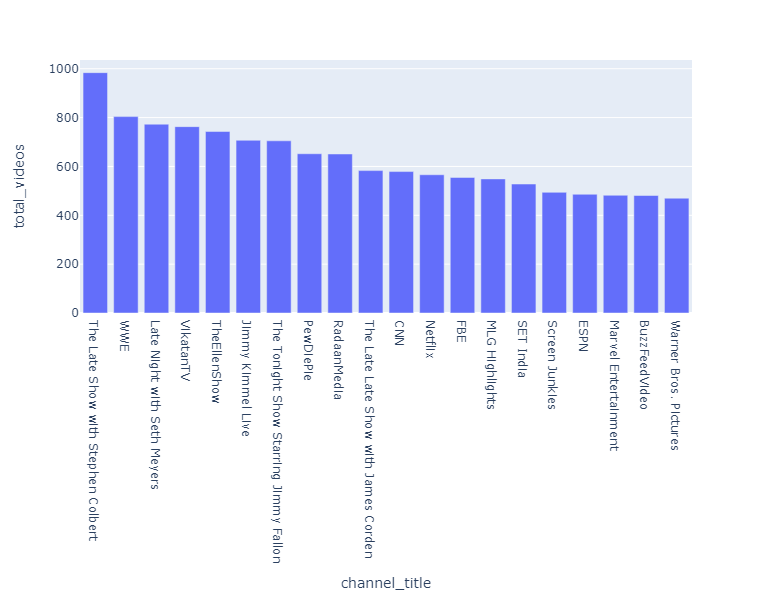

In [153]:

px.bar(cdf[0:20], x= 'channel_title', y = 'total_videos', height = 600)